In [47]:
import os
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

In [48]:
data = pd.read_csv('activities1.csv')

In [50]:
#rows and columns returns (rows, columns)
data.shape

(1678, 77)

In [51]:
data.describe()

,Activity ID,Elapsed Time,Relative Effort,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,...,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow
count,1.678000e+03,1678.000000,1266.000000,1482.000000,1343.000000,1626.000000,1678.000000,1676.000000,1657.000000,369.000000,...,3.120000e+02,129.000000,22.0,129.000000,129.000000,129.000000,129.000000,0.0,0.0,0.0
mean,1.765963e+09,7242.074493,73.540284,76.784076,9.467908,7288.300123,4713.205602,31199.418778,13.135558,7.383677,...,2.201481e+06,0.042016,5.0,0.324264,15953.116279,1.581395,309.568992,NaN,NaN,NaN
std,1.173864e+09,26882.851516,61.898671,1.339904,0.951760,27295.297955,3792.521227,29566.228153,5.284180,2.731502,...,1.704296e+06,0.169265,0.0,0.300431,724.649103,1.967302,25.092775,NaN,NaN,NaN
min,6.977701e+07,1.000000,0.000000,75.000000,7.800000,1.000000,1.000000,0.000000,0.000000,0.000000,...,3.386890e+05,0.000000,5.0,0.000000,10725.000000,0.000000,264.399994,NaN,NaN,NaN
25%,8.022883e+08,2737.750000,30.000000,75.000000,9.000000,2728.000000,2373.000000,9604.199951,9.400000,5.981266,...,1.088707e+06,0.000000,5.0,0.090000,16093.000000,0.000000,290.700012,NaN,NaN,NaN
50%,1.533524e+09,4083.500000,58.000000,77.000000,9.600000,4131.000000,3614.000000,22648.250000,13.500000,7.869838,...,2.299379e+06,0.000000,5.0,0.210000,16093.000000,1.000000,308.000000,NaN,NaN,NaN
75%,2.672041e+09,7997.750000,97.750000,78.000000,9.600000,8007.000000,5901.750000,42768.224609,16.500000,8.998000,...,4.251544e+06,0.000000,5.0,0.510000,16093.000000,2.000000,320.700012,NaN,NaN,NaN
max,4.272588e+09,801200.000000,486.000000,78.000000,15.000000,801200.000000,29876.000000,183909.500000,36.400002,12.503000,...,4.941845e+06,1.000000,5.0,1.000000,16093.000000,9.000000,401.299988,NaN,NaN,NaN


In [52]:
data.isnull().any()

Activity ID                                                                                       False
Activity Date                                                                                     False
Activity Name                                                                                     False
Activity Type                                                                                     False
Activity Description                                                                               True
                                                                                                  ...  
UV Index                                                                                           True
Weather Ozone                                                                                      True
translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count     True
translation missing: en-US.lib.export.portability_exporter.activ

In [53]:
#basic information on all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 77 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Activity ID                                                                                     1678 non-null   int64  
 1   Activity Date                                                                                   1678 non-null   object 
 2   Activity Name                                                                                   1678 non-null   object 
 3   Activity Type                                                                                   1678 non-null   object 
 4   Activity Description                                                                            178 non-null    object 
 5   Elapsed Time 

Lets creat a new dataframe with on the columns we would need for the next stage

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 77 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Activity ID                                                                                     1678 non-null   int64  
 1   Activity Date                                                                                   1678 non-null   object 
 2   Activity Name                                                                                   1678 non-null   object 
 3   Activity Type                                                                                   1678 non-null   object 
 4   Activity Description                                                                            178 non-null    object 
 5   Elapsed Time 

In [55]:
#lets pick the columns from data and paste them into a new dataframe
data_strava = data[['Activity ID','Distance','Activity Date','Moving Time','Relative Effort','Activity Name','Activity Type','Elapsed Time','Elevation Gain','Max Speed','Calories','Average Cadence','Average Heart Rate','Max Heart Rate','Average Watts','Athlete Weight','Average Temperature']]




In [56]:
#lets rename the columns and delete the space and keep the activity names in lowercases.
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
data_strava = data_strava.rename(columns={'Activity ID':'activity_id'})
data_strava = data_strava.rename(columns={'Activity Date':'activity_data'})
data_strava = data_strava.rename(columns={'Moving Time':'moving_time'})
data_strava = data_strava.rename(columns={'Relative Effort':'relative_effort'})
data_strava = data_strava.rename(columns={'Activity Name':'activity_name'})
data_strava = data_strava.rename(columns={'Activity Type':'activity_type'})
data_strava = data_strava.rename(columns={'Elapsed Time':'elapsed_time'})
data_strava = data_strava.rename(columns={'Elevation Gain':'elevation_gain'})
data_strava = data_strava.rename(columns={'Calories':'calories'})
data_strava = data_strava.rename(columns={'Average Cadence':'avg_cadence'})
data_strava = data_strava.rename(columns={'Average Heart Rate':'avg_hr'})
data_strava = data_strava.rename(columns={'Average Watts':'avg_power'})
data_strava = data_strava.rename(columns={'Athlete Weight':'weight'})
data_strava = data_strava.rename(columns={'Average Temperature':'temperature'})
data_strava = data_strava.rename(columns={'Max Heart Rate':'max_hr'})
data_strava = data_strava.rename(columns={'Max Speed':'max_speed'})
data_strava = data_strava.rename(columns={'Distance':'distance'})
data_strava = data_strava[data_strava.activity_type != "Swim"]




In [57]:
#lets have a look at all the data
data_strava

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,calories,avg_cadence,avg_hr,max_hr,avg_power,weight,temperature
0,69777014,32.27,"Jul 25, 2013, 4:28:48 PM",6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.330017,16.200001,1092.182373,NaN,NaN,NaN,155.087997,78.0,NaN
1,69924640,38.00,"Jul 26, 2013, 6:26:32 AM",5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,927.903015,15.900000,1542.808228,NaN,NaN,NaN,263.208008,78.0,NaN
2,70016289,91.00,"Jul 23, 2013, 8:00:00 AM",11760.0,NaN,Ride !,Ride,11760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN
3,70016552,82.00,"Jul 22, 2013, 6:00:00 AM",10800.0,NaN,Ride !,Ride,10800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN
4,70105275,69.23,"Jul 27, 2013, 5:54:10 AM",9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1355.560059,24.200001,2233.324219,NaN,NaN,NaN,221.936996,78.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,4253466121,25.62,"Oct 28, 2020, 7:52:52 AM",6674.0,149.0,Climbing Ride!,Ride,7466,804.590027,13.300000,1706.000000,75.036186,149.180359,NaN,157.939194,NaN,9.0
1674,4257824653,65.34,"Oct 29, 2020, 8:16:30 AM",8889.0,121.0,Last ride before lockdown ...,Ride,9172,952.000000,16.600000,1331.000000,75.571136,138.121109,NaN,188.123154,NaN,9.0
1675,4262091748,29.91,"Oct 30, 2020, 12:06:39 PM",3562.0,102.0,Tour De KOMfinement - Étape 1,Ride,3562,430.911926,17.900000,734.000000,77.027458,155.292496,NaN,258.865143,NaN,14.0
1676,4267262893,28.41,"Oct 31, 2020, 2:53:56 PM",3483.0,86.0,Tour De KOMfinement - Étape 2,Ride,3483,529.000000,18.200001,641.000000,75.005592,152.067993,NaN,232.549408,NaN,11.0


In [58]:
data_strava['activity_type'].value_counts()

Ride               987
Virtual Ride       358
Run                278
Hike                20
Workout              6
Walk                 3
E-Bike Ride          3
Nordic Ski           3
Alpine Ski           1
Snowshoe             1
Kayaking             1
Backcountry Ski      1
Name: activity_type, dtype: int64

In [59]:
#shows for each column the percentage of null values 
data_strava.isnull().sum() / data_strava.shape[0]

activity_id        0.000000
distance           0.000000
activity_data      0.000000
moving_time        0.000000
relative_effort    0.238869
activity_name      0.000000
activity_type      0.000000
elapsed_time       0.000000
elevation_gain     0.036101
max_speed          0.012635
calories           0.354994
avg_cadence        0.456679
avg_hr             0.264140
max_hr             0.333935
avg_power          0.206980
weight             0.112515
temperature        0.745487
dtype: float64

In [60]:
#Separate date column into Date and Time
new = data_strava["activity_data"].str.split(",", n = 1, expand = True) 
data_strava["date"]= new[0] 
data_strava["year"]= new[1] 
new = data_strava["date"].str.split(" ", n = 1, expand = True) 
data_strava["month"]= new[0] 
data_strava["day"]= new[1] 
new = data_strava["year"].str.split(",", n = 1, expand = True) 
data_strava["year"]= new[0] 
data_strava["time"]= new[1]
#dropping the column date
#data_strava = data_strava.drop(['date'], axis=1)

In [61]:
#Lets round all the columns
data_strava = data_strava.round(0)

In [62]:
#Convert elapsed_time from seconds to minutes and hours
#data_strava['elapsed_time'] = pd.to_datetime(data_strava.elapsed_time, unit='s').dt.strftime('%H:%M')
#data_strava['moving_time'] = pd.to_datetime(data_strava.moving_time, unit='s').dt.strftime('%H:%M')

In [63]:
data_strava["distance"].apply(lambda x: float(x))


0       32.27
1       38.00
2       91.00
3       82.00
4       69.23
        ...  
1673    25.62
1674    65.34
1675    29.91
1676    28.41
1677     7.48
Name: distance, Length: 1662, dtype: float64

In [64]:
data_strava["activity_count"]=1
data_strava["time_hour"]= data_strava["moving_time"]*3600
#float(["distance"])
data_strava["speed"]= float(data_strava["distance"]) / float(data_strava["time_hour"])

TypeError: cannot convert the series to <class 'float'>

In [65]:
data_strava

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,avg_power,weight,temperature,date,year,month,day,time,activity_count,time_hour
0,69777014,32.27,"Jul 25, 2013, 4:28:48 PM",6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,155.0,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,22737600.0
1,69924640,38.00,"Jul 26, 2013, 6:26:32 AM",5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,263.0,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,18925200.0
2,70016289,91.00,"Jul 23, 2013, 8:00:00 AM",11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,NaN,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,42336000.0
3,70016552,82.00,"Jul 22, 2013, 6:00:00 AM",10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,NaN,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,38880000.0
4,70105275,69.23,"Jul 27, 2013, 5:54:10 AM",9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,222.0,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,32490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,4253466121,25.62,"Oct 28, 2020, 7:52:52 AM",6674.0,149.0,Climbing Ride!,Ride,7466,805.0,13.0,...,158.0,NaN,9.0,Oct 28,2020,Oct,28,7:52:52 AM,1,24026400.0
1674,4257824653,65.34,"Oct 29, 2020, 8:16:30 AM",8889.0,121.0,Last ride before lockdown ...,Ride,9172,952.0,17.0,...,188.0,NaN,9.0,Oct 29,2020,Oct,29,8:16:30 AM,1,32000400.0
1675,4262091748,29.91,"Oct 30, 2020, 12:06:39 PM",3562.0,102.0,Tour De KOMfinement - Étape 1,Ride,3562,431.0,18.0,...,259.0,NaN,14.0,Oct 30,2020,Oct,30,12:06:39 PM,1,12823200.0
1676,4267262893,28.41,"Oct 31, 2020, 2:53:56 PM",3483.0,86.0,Tour De KOMfinement - Étape 2,Ride,3483,529.0,18.0,...,233.0,NaN,11.0,Oct 31,2020,Oct,31,2:53:56 PM,1,12538800.0


In [68]:
#This code will change activity data column into datetime object and then will store the date into a new column
#data_strava['activity_data'] = data_strava['activity_data'].apply(pd.to_numeric, errors='coerce')
data_strava['activity_data'] = pd.to_datetime(data_strava['activity_data'])
data_strava['dates'] = data_strava['activity_data'].dt.date


In [69]:
data_strava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 1677
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   activity_id      1662 non-null   int64         
 1   distance         1662 non-null   object        
 2   activity_data    1662 non-null   datetime64[ns]
 3   moving_time      1662 non-null   float64       
 4   relative_effort  1265 non-null   float64       
 5   activity_name    1662 non-null   object        
 6   activity_type    1662 non-null   object        
 7   elapsed_time     1662 non-null   int64         
 8   elevation_gain   1602 non-null   float64       
 9   max_speed        1641 non-null   float64       
 10  calories         1072 non-null   float64       
 11  avg_cadence      903 non-null    float64       
 12  avg_hr           1223 non-null   float64       
 13  max_hr           1107 non-null   float64       
 14  avg_power        1318 non-null   float64

In [70]:
data_strava.to_csv('data_out.csv')

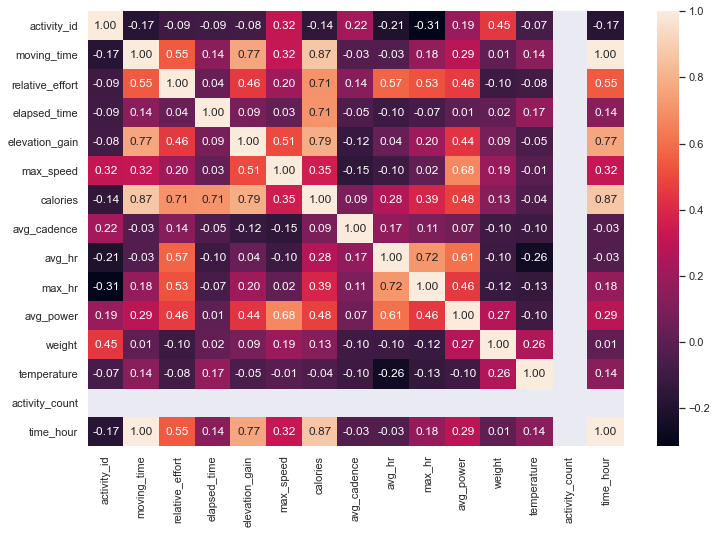

In [24]:
corr = data_strava.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [25]:
import plotly.express as px
fig = px.pie(data_strava, values='activity_count', names='activity_type')
fig.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Activity Type')
fig.show()

In [ ]:
fig = px.pie(data_strava, values='activity_count', names='activity_type')
fig.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Activity Type')
fig.show()

In [26]:
data_strava.head()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,22737600.0,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,18925200.0,2013-07-26
2,70016289,91.00,2013-07-23 08:00:00,11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,42336000.0,2013-07-23
3,70016552,82.00,2013-07-22 06:00:00,10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,38880000.0,2013-07-22
4,70105275,69.23,2013-07-27 05:54:10,9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,32490000.0,2013-07-27


convert data to be able to create a radar plot 

In [27]:
df =  data_strava.groupby("year").sum()
df.reset_index(inplace=True)

fig = go.Figure([
    go.Scatter(
        name='activity_count',
        x=df['year'],
        y=df['activity_count'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )
])
fig.update_layout(
    yaxis_title='Number of activity',
    title='Number of activity per year',
    xaxis_title = 'Time(Days)',
    hovermode="x"
)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [28]:
df =  data_strava.groupby("dates").sum()
df.reset_index(inplace=True)

fig = go.Figure([
    go.Scatter(
        name='activity_count',
        x=df['dates'],
        y=df['activity_count'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )
])
fig.update_layout(
    yaxis_title='Number of activity',
    title='Number of activity per year',
    xaxis_title = 'Time(Days)',
    hovermode="x"
)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [29]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="avg_hr")
fig.show()

In [30]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="temperature")
fig.show()

In [31]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="avg_power")
fig.show()

In [32]:
#Plot relative effort
fig = px.box(data_strava, x="month",y="relative_effort")
fig.show()

In [33]:
fig = px.bar(data_strava, x="year", y="activity_count", color="activity_type", title="Number of Activities per Year",
                         color_discrete_sequence=["red","orange","lime","teal","gold","olive","cyan","white","black","brown","purple", "green", "blue", "yellow","goldenrod", "magenta"],
)
fig.show()

In [34]:
data_strava.head()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,22737600.0,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,18925200.0,2013-07-26
2,70016289,91.00,2013-07-23 08:00:00,11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,42336000.0,2013-07-23
3,70016552,82.00,2013-07-22 06:00:00,10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,38880000.0,2013-07-22
4,70105275,69.23,2013-07-27 05:54:10,9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,32490000.0,2013-07-27


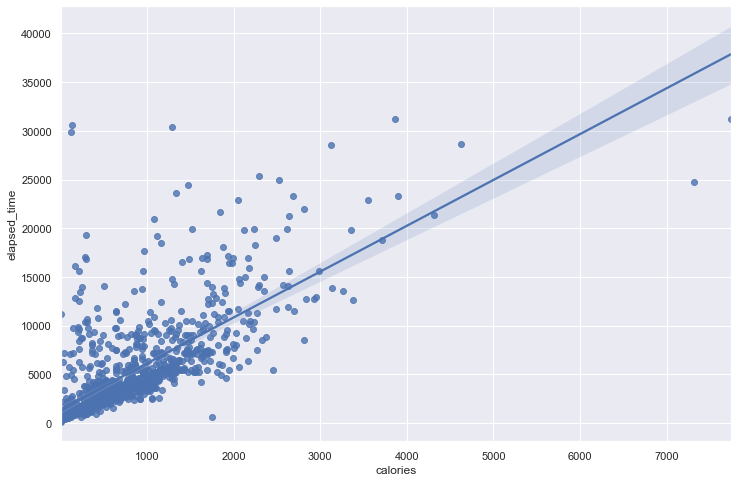

In [35]:
#test of a non legit regression
plt.figure(figsize=(12, 8))
sns.regplot(x='calories', y='elapsed_time', data=data_strava);
#plt.title('Temperature vs. Elevation Gain');
#plt.xlabel("Calories")
#plt.ylabel("Elevation")

In [36]:
data_run = data_strava[data_strava.activity_type == 'Run']
data_ride = data_strava[data_strava.activity_type == 'Ride']

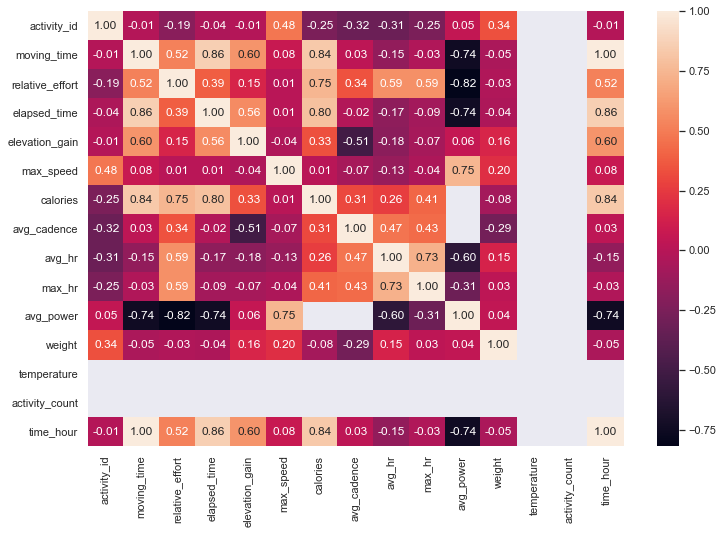

In [37]:
corr = data_run.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

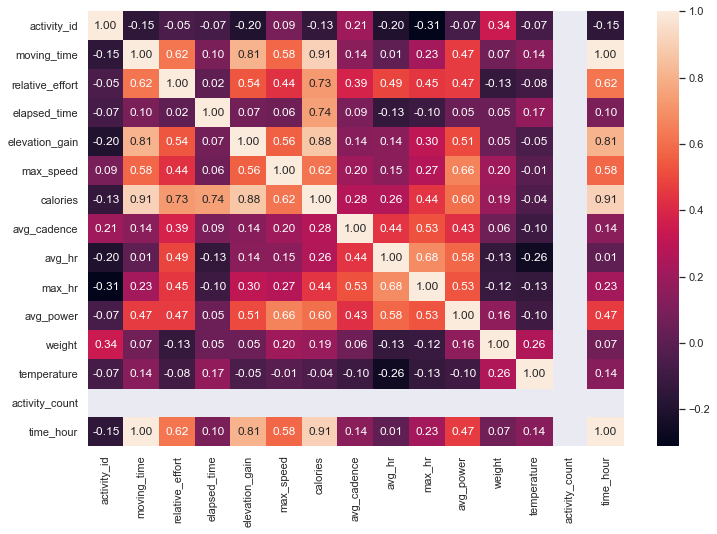

In [38]:
corr = data_ride.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [66]:
data_ride.tail()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
1672,4245089387,22.71,2020-10-26 08:05:34,4625.0,86.0,MTB - Wet and Cold,Ride,5161,561.0,14.0,...,NaN,7.0,Oct 26,2020,Oct,26,8:05:34 AM,1,16650000.0,2020-10-26
1673,4253466121,25.62,2020-10-28 07:52:52,6674.0,149.0,Climbing Ride!,Ride,7466,805.0,13.0,...,NaN,9.0,Oct 28,2020,Oct,28,7:52:52 AM,1,24026400.0,2020-10-28
1674,4257824653,65.34,2020-10-29 08:16:30,8889.0,121.0,Last ride before lockdown ...,Ride,9172,952.0,17.0,...,NaN,9.0,Oct 29,2020,Oct,29,8:16:30 AM,1,32000400.0,2020-10-29
1675,4262091748,29.91,2020-10-30 12:06:39,3562.0,102.0,Tour De KOMfinement - Étape 1,Ride,3562,431.0,18.0,...,NaN,14.0,Oct 30,2020,Oct,30,12:06:39 PM,1,12823200.0,2020-10-30
1676,4267262893,28.41,2020-10-31 14:53:56,3483.0,86.0,Tour De KOMfinement - Étape 2,Ride,3483,529.0,18.0,...,NaN,11.0,Oct 31,2020,Oct,31,2:53:56 PM,1,12538800.0,2020-10-31


In [67]:
import plotly.express as px

fig = px.histogram(data_ride, x="distance", nbins=60)
fig.update_layout(
    yaxis_title='Count',
    #title='Frequence of ',
    xaxis_title = 'Distance(km)',
    hovermode="x"
)


fig.show()


In [68]:
fig = px.histogram(data_run, x="distance", nbins=60)
fig.show()

In [41]:
fig = px.scatter(data_strava, x="moving_time", y="distance",color="activity_type")
fig.show()

In [40]:
fig = px.scatter(data_strava, x="moving_time", y="distance",color="year")
fig.show()

In [42]:
fig = px.scatter(data_strava, x="moving_time", y="avg_hr",color="year")
fig.show()

In [70]:
data_ride.to_csv('data_out_ride.csv')

Source: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [71]:
data_ride['month'].value_counts()
data_ride.groupby(['month']).groups.keys()


dict_keys(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'])

In [72]:
data_strava.groupby(['month', 'activity_type'])['date'].count()


month  activity_type
Apr    E-Bike Ride        2
       Hike               1
       Nordic Ski         1
       Ride              71
       Run               22
                       ... 
Oct    Workout            2
Sep    Ride             100
       Run               38
       Virtual Ride      21
       Workout            1
Name: date, Length: 61, dtype: int64

In [73]:
# Group the data frame by month and item and extract a number of stats from each group
summary = data_strava.groupby(
    ['month', 'activity_type']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'elapsed_time': [min, max, sum],
        # find the number of network type entries
        'activity_type': "count",
        # minimum, first, and number of unique dates
        #'date': [min, 'first', 'nunique']
    }
)

In [74]:
print(summary)

                    elapsed_time                activity_type
                             min    max     sum         count
month activity_type                                          
Apr   E-Bike Ride            990   2015    3005             2
      Hike                 24468  24468   24468             1
      Nordic Ski           88150  88150   88150             1
      Ride                    22  20084  558942            71
      Run                    852   5483   77276            22
...                          ...    ...     ...           ...
Oct   Workout               2328   2888    5216             2
Sep   Ride                   414  30587  843862           100
      Run                   1793   7703  145894            38
      Virtual Ride           824   5510   62989            21
      Workout               2193   2193    2193             1

[61 rows x 4 columns]


In [75]:
data1 = data_strava.groupby(
    ['year','activity_type']
).agg(
    {

        # find the number of network type entries
        'activity_type': "count",
        'moving_time' : "sum"
    }
)
print(data1)

                       activity_type  moving_time
year  activity_type                              
 2013 Ride                        38     368326.0
      Run                          3      12036.0
 2014 Nordic Ski                   1       5359.0
      Ride                        38     328035.0
      Run                         24      74695.0
      Snowshoe                     1       1168.0
      Workout                      1        696.0
 2015 Hike                         3      22614.0
      Ride                       130     976545.0
      Run                         34     129497.0
 2016 Backcountry Ski              1       3937.0
      Hike                         9      78948.0
      Ride                        98     575559.0
      Run                         50     160456.0
 2017 E-Bike Ride                  3       3575.0
      Ride                       283    1110550.0
      Run                         53     169429.0
      Virtual Ride                12      40888.0


In [76]:
data1.to_csv('data2.csv')

In [77]:
data1 = pd.read_csv('data2.csv')

In [78]:
fig = px.bar(data1, x="year", y="activity_type.1", color="activity_type", title="Number of Activities per Year",
                         color_discrete_sequence=["red","blue","yellow","teal","gold","olive","cyan","white","black","brown","purple", "green", "blue", "yellow","goldenrod", "magenta"],
)
fig.show()

In [79]:
fig = px.bar(data1, x="year", y="moving_time", color="activity_type", title="Number of Activities per Year",
                         color_discrete_sequence=["red","blue","yellow","teal","gold","olive","cyan","white","black","brown","purple", "green","goldenrod", "magenta"],
)
fig.show()